<a href="https://colab.research.google.com/github/Edgleyson-Ferreira/ML/blob/master/Doencas_cardiacas_CrossValidation_GridSearch_Atividade_chatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries

import sys
import scipy
import numpy
import matplotlib
import pandas as pd
import seaborn as sns
import sklearn
import imblearn
import xgboost

O módulo **sys** fornece funções e variáveis ​​usadas para manipular  diferentes partes do ambiente de tempo de execução do Python e apesar de serem completamente diferentes, muitas pessoas confundem o módulo sys e o módulo os (módulo para manipular o sistema operacional).
https://pt.stackoverflow.com/questions/432235/como-funciona-o-módulo-sys-do-python-e-para-que-ele-serve

**SciPy** é uma biblioteca Open Source em linguagem Python que foi feita para matemáticos, cientistas e engenheiros. Também tem o nome de uma popular conferência de programação científica com Python.[1][2]

A sua biblioteca central é **NumPy** que fornece uma manipulação conveniente e rápida de um array N-dimensional. A biblioteca SciPy foi desenvolvida para trabalhar com arrays NumPy, e fornece muitas rotinas amigáveis e bem eficientes como rotinas para integração numérica e otimização.[3]
https://pt.wikipedia.org/wiki/SciPy#:~:text=SciPy%20é%20uma%20biblioteca%20Open,de%20um%20array%20N-dimensional.

O **Matplotlib** é uma biblioteca para a visualização de dados em Python. Ele apresenta uma API orientada a objetos que permite a criação de gráficos em 2D de uma forma simples e com poucos comandos. A ferramenta disponibiliza diversos tipos de gráficos, como em barra, em linha, em pizza, histogramas entre outras opções.

https://king.host/blog/2018/03/visualizacao-de-dados-matplotlib/#:~:text=O%20Matplotlib%20é%20uma%20biblioteca,pizza%2C%20histogramas%20entre%20outras%20opções.



**Pandas** é uma biblioteca para uso em Python, open-source e de uso gratuito (sob uma licença BSD), que fornece ferramentas para análise e manipulação de dados.

https://harve.com.br/blog/programacao-python-blog/pandas-python-vantagens-e-como-comecar/#:~:text=o%20Pandas%20Python%3F-,Pandas%20é%20uma%20biblioteca%20para%20uso%20em%20Python%2C%20open-source,análise%20e%20manipulação%20de%20dados.

O **Scikit-Learn** fornece ferramentas importantes para os vários momentos do ciclo de projetos de Machine Learning, como: Datasets: disponibiliza alguns datasets que podem ser baixados para o projeto com poucos comandos, como o dataset Iris, um dos mais conhecidos da área de reconhecimento de padrões.

https://tatianaesc.medium.com/implementando-um-modelo-de-classificação-no-scikit-learn-6206d684b377#:~:text=O%20Scikit-Learn%20fornece%20ferramentas,área%20de%20reconhecimento%20de%20padrões.


In [2]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from numpy import random
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [3]:
# load through url
# ler a url. É possível baixar o arquivo *.csv e adicionar o path
url = 'https://gist.githubusercontent.com/Edgleyson-Ferreira/d31517f70706fde6c31accd7459eb2f3/raw/91788fb87c7d28670e7a6e055661c9126a4041fa/processed.cleveland.csv'
#definir atributos para os nomes das colunas
attributes = ["idade", "sexo", "tipo_dor", "pressao_arterial", "colesterol_serico", "glicemia", "eletrocardio", "frequencia_cardiaca_max", "angina", "depressao_ST", "inclinacao", "num_vasos", "thal", "diag"]
#na leitura dos dados, o parâmetro names é usado para definir o nome das colunas
dataset = pd.read_csv(url, names = attributes)
dataset.columns = attributes

In [4]:
#análise da correlação
correlation = dataset.corr()

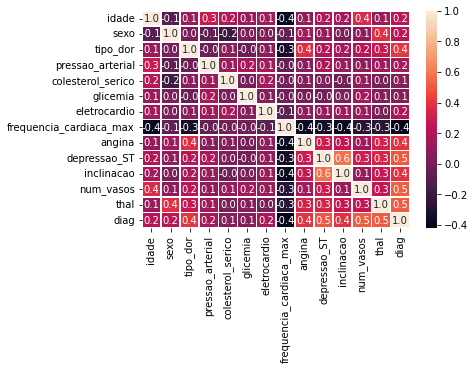

In [5]:
# plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [6]:
dados = dataset.drop('frequencia_cardiaca_max', axis=1)
print(dados.head(20))
newCorrelation = dados.corr()

    idade  sexo  tipo_dor  pressao_arterial  colesterol_serico  glicemia  \
0    67.0   1.0       4.0             160.0              286.0       0.0   
1    67.0   1.0       4.0             120.0              229.0       0.0   
2    37.0   1.0       3.0             130.0              250.0       0.0   
3    41.0   0.0       2.0             130.0              204.0       0.0   
4    56.0   1.0       2.0             120.0              236.0       0.0   
5    62.0   0.0       4.0             140.0              268.0       0.0   
6    57.0   0.0       4.0             120.0              354.0       0.0   
7    63.0   1.0       4.0             130.0              254.0       0.0   
8    53.0   1.0       4.0             140.0              203.0       1.0   
9    57.0   1.0       4.0             140.0              192.0       0.0   
10   56.0   0.0       2.0             140.0              294.0       0.0   
11   56.0   1.0       3.0             130.0              256.0       1.0   
12   44.0   

In [7]:
# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

In [8]:
#ter uma dimensão de quantas instâncias (linhas) e quantos atributos (colunas) os dados contêm
print(dataset.shape)

(296, 14)


In [9]:
#analisar os dados
print(dataset.head(20))

    idade  sexo  tipo_dor  pressao_arterial  colesterol_serico  glicemia  \
0    67.0   1.0       4.0             160.0              286.0       0.0   
1    67.0   1.0       4.0             120.0              229.0       0.0   
2    37.0   1.0       3.0             130.0              250.0       0.0   
3    41.0   0.0       2.0             130.0              204.0       0.0   
4    56.0   1.0       2.0             120.0              236.0       0.0   
5    62.0   0.0       4.0             140.0              268.0       0.0   
6    57.0   0.0       4.0             120.0              354.0       0.0   
7    63.0   1.0       4.0             130.0              254.0       0.0   
8    53.0   1.0       4.0             140.0              203.0       1.0   
9    57.0   1.0       4.0             140.0              192.0       0.0   
10   56.0   0.0       2.0             140.0              294.0       0.0   
11   56.0   1.0       3.0             130.0              256.0       1.0   
12   44.0   

In [10]:
#ver resumo estatístico: contagem, média, valores mínimo e máximo, e alguns percentuais
print(dataset.describe())

            idade        sexo    tipo_dor  pressao_arterial  \
count  296.000000  296.000000  296.000000        296.000000   
mean    54.513514    0.675676    3.165541        131.648649   
std      9.051631    0.468915    0.958262         17.775956   
min     29.000000    0.000000    1.000000         94.000000   
25%     48.000000    0.000000    3.000000        120.000000   
50%     56.000000    1.000000    3.000000        130.000000   
75%     61.000000    1.000000    4.000000        140.000000   
max     77.000000    1.000000    4.000000        200.000000   

       colesterol_serico    glicemia  eletrocardio  frequencia_cardiaca_max  \
count         296.000000  296.000000    296.000000               296.000000   
mean          247.398649    0.141892      0.993243               149.597973   
std            52.078915    0.349530      0.994879                22.980401   
min           126.000000    0.000000      0.000000                71.000000   
25%           211.000000    0.000000 

In [11]:
#distribuição por classe
print(dataset.groupby("diag").size())

diag
0    159
1     54
2     35
3     35
4     13
dtype: int64


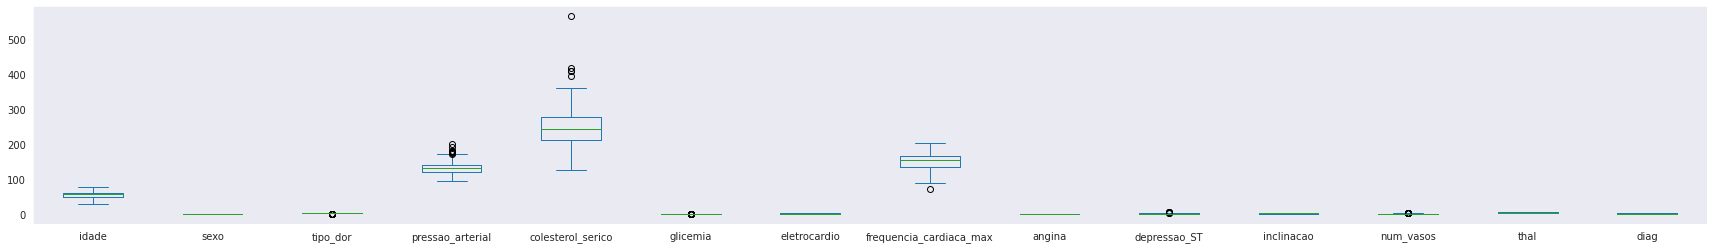

In [12]:
#criar gráfico de caixas (bloxplot)
dataset.plot(kind='box', subplots=False, figsize=(30, 4))
plt.show()

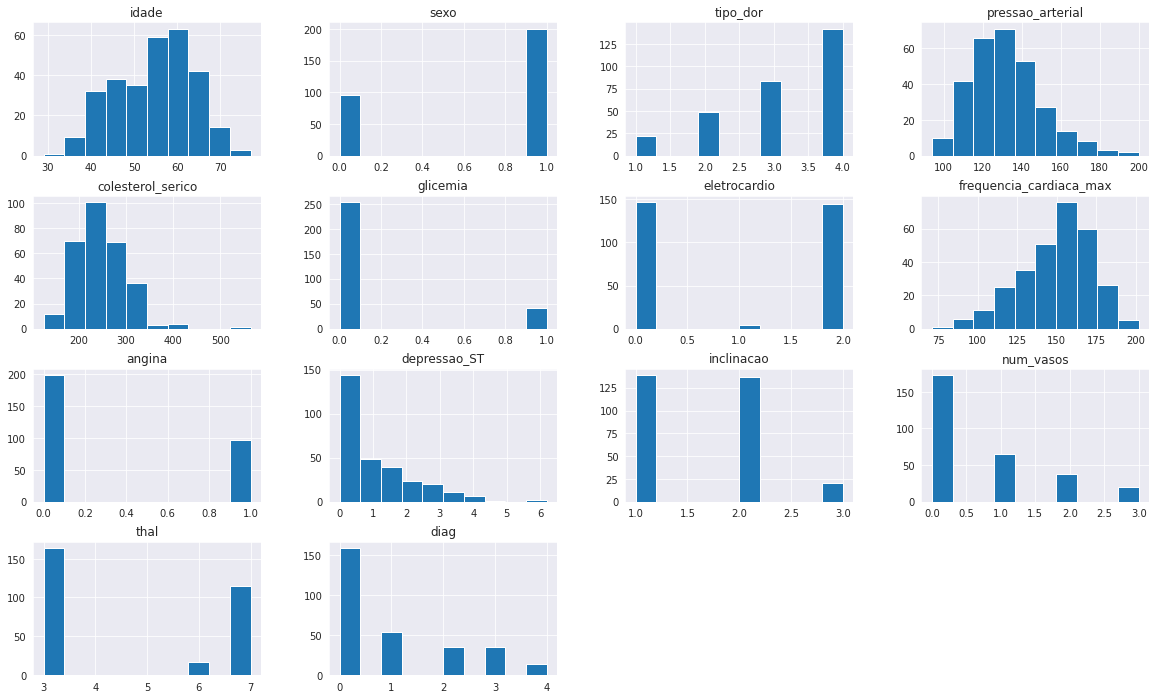

In [13]:
# histogramas - diagramas de uma variável
dataset.hist(figsize=(20, 12))
plt.show()

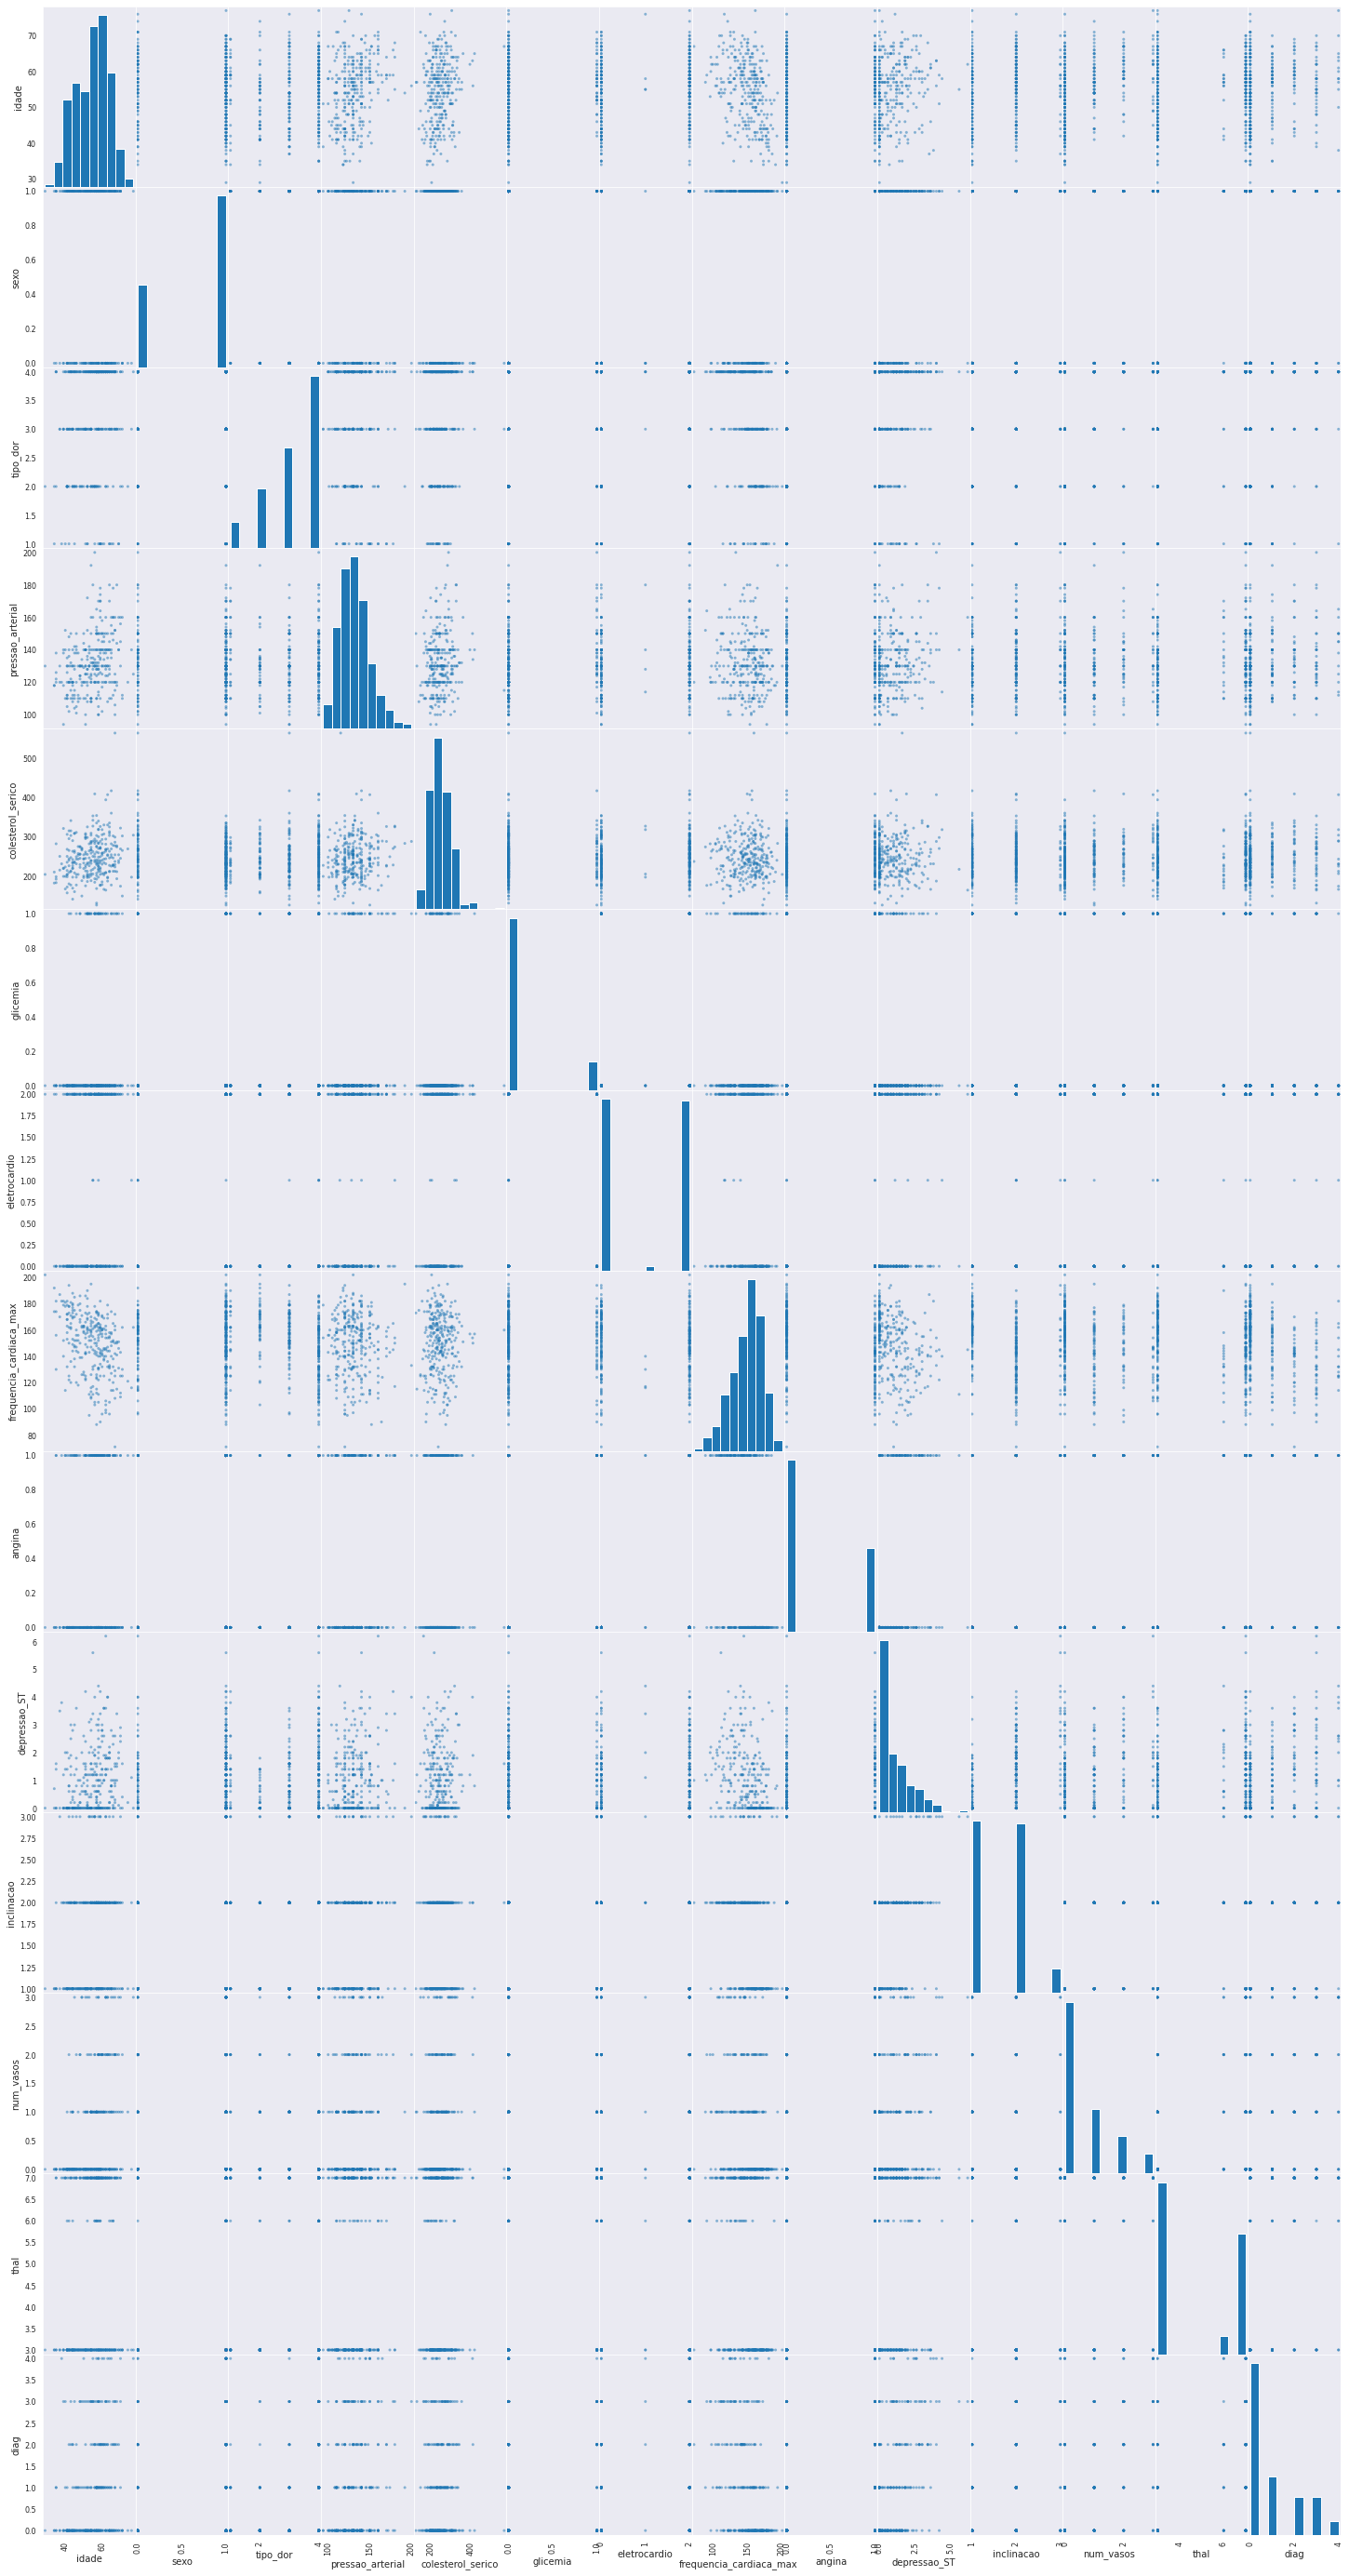

In [14]:
# Gráficos Multivariados (observar presença de agrupamentos diagonais)
scatter_matrix(dataset, figsize=(25, 50))
plt.show()

In [15]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]

validation_size = 0.33
SEED = 42
random.seed(SEED)
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = SEED)

In [16]:
# Cross Validation

# StratifiedKFold
cv = StratifiedKFold(n_splits = 10, shuffle = True)

# KFold
# cv = model_selection.KFold(n_splits=10, shuffle=True)#setar o embaralhamento

LR: 0.581149 (0.042042)
Acurácia média: 58.11%
Intervalo de acurácia: [49.71% ~ 66.52%]
----------------------------
LDA: 0.594828 (0.062172)
Acurácia média: 59.48%
Intervalo de acurácia: [47.05% ~ 71.92%]
----------------------------
KNN: 0.507356 (0.057857)
Acurácia média: 50.74%
Intervalo de acurácia: [39.16% ~ 62.31%]
----------------------------
CART: 0.479885 (0.081821)
Acurácia média: 47.99%
Intervalo de acurácia: [31.62% ~ 64.35%]
----------------------------
NB: 0.530575 (0.053374)
Acurácia média: 53.06%
Intervalo de acurácia: [42.38% ~ 63.73%]
----------------------------
SVM: 0.537241 (0.010587)
Acurácia média: 53.72%
Intervalo de acurácia: [51.61% ~ 55.84%]
----------------------------


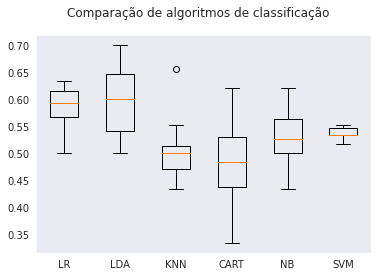

In [17]:
# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []

def intervalo(results):
  mean = results.mean()
  dv = results.std()
 
  print('Acurácia média: {:.2f}%'.format(mean*100))
  print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
        .format((mean - 2*dv)*100, (mean + 2*dv)*100))
  print('----------------------------')
  
for name, model in models:  
   cv_results = model_selection.cross_val_score(model, X, Y, cv= cv, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)
   intervalo(cv_results)

      

#Boxsplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de algoritmos de classificação')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Cross Validation

In [30]:
classifier = LogisticRegression(solver='newton-cg', multi_class='ovr')
classifier.fit(X_train, Y_train)

cv_results = model_selection.cross_val_score(classifier, X_train, Y_train, cv = cv, scoring=scoring)

#Usando a média e o desvio padrão
print("Acurácia do Cross Validation: %.3f%%" % (cv_results.mean() * 100.0))

# funcao de intervalo de acurácia
intervalo(cv_results)



Acurácia do Cross Validation: 55.105%
Acurácia média: 55.11%
Intervalo de acurácia: [41.17% ~ 69.04%]
----------------------------


In [46]:
#Criação do modelo
#modelo = LogisticRegression(solver='newton-cg', multi_class='ovr')
# Random Forest
num_folds = 10
num_trees = 100
max_features = 3

# Criando modelo
modelo = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)


#Treinamendo do modelo
modelo.fit(X_train, Y_train)

#Score do modelo nos dados de teste
result = modelo.score(X_validation, Y_validation)
print("Acurácia nos dados de teste: %.3f%%" % (result * 100.0))

Acurácia nos dados de teste: 61.224%


#Grid Search

In [47]:
# Define the grid search parameters
valores_grid = {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Creating the grid
grid = GridSearchCV(estimator=modelo, param_grid=valores_grid, cv=num_folds)
grid.fit(X_train, Y_train)

# Print the results
print("Accuracy: %.3f" % (grid.best_score_ * 100))
print("Best Model Parameters: \n", grid.best_estimator_)

Accuracy: 58.658
Best Model Parameters: 
 RandomForestClassifier(max_depth=20, max_features=3, min_samples_leaf=4,
                       min_samples_split=5)
